In [1]:
from qiskit.quantum_info import SparsePauliOp

def build_custom_cost_paulis_with_time(C, T, A, time_intervals):
    n = len(C)  # number of microgrids
    m = len(C[0])  # number of time intervals
    pauli_list = []

    # Loop over time intervals
    for t in range(time_intervals):
        for i in range(n):  # microgrid i
            for j in range(n):  # microgrid j
                for p in range(m):  # time slot p
                    for q in range(m):  # time slot q
                        coeff = C[i][j] * T[t][p][q]  # Incorporate time-dependent T[p][q](t)
                        pauli_str = ['I'] * (n * m)  # Initialize with Identity operators
                        pauli_str[p * n + i] = 'Z'  # Apply Z to qubit at position (p, i)
                        pauli_str[q * n + j] = 'Z'  # Apply Z to qubit at position (q, j)
                        pauli_list.append((''.join(pauli_str), coeff))

    # Constraint 1: Ensure each item appears once, sum over time t
    for i in range(n):
        for p1 in range(m):
            for p2 in range(m):
                coeff = A
                pauli_str = ['I'] * (n * m)
                pauli_str[p1 * n + i] = 'Z'
                pauli_str[p2 * n + i] = 'Z'
                pauli_list.append((''.join(pauli_str), coeff))

    # Cnstraint 2: Each position used once, sum over time t
    for p in range(m):
        for i1 in range(n):
            for i2 in range(n):
                coeff = A
                pauli_str = ['I'] * (n * m)
                pauli_str[p * n + i1] = 'Z'
                pauli_str[p * n + i2] = 'Z'
                pauli_list.append((''.join(pauli_str), coeff))

    # Construct SparsePauliOp from the list
    return pauli_list

# Example usage:
C1 = [[1, 2, 3], [3, 4, 5], [8, 1, 2]]  # Example cost matrix
T1 = [[[0.5, 0.6, 0.1], [0.7, 0.8, 0.1], [0.7, 0.8, 0.1]], [[0.9, 1.0, 0.1], [1.1, 1.2, 0.1], [0.7, 0.8, 0.1]], [[0.9, 1.0, 0.1], [1.1, 1.2, 0.1], [0.7, 0.8, 0.1]]]  # Example time-dependent weight matrix
A1 = 10  # Penalty term
time_intervals = 3 # Assuming 2 time intervals
max_cut_paulis_with_time = build_custom_cost_paulis_with_time(C1, T1, A1, time_intervals)
print("Cost Function Hamiltonian:", max_cut_paulis_with_time)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis_with_time)


Cost Function Hamiltonian: [('ZIIIIIIII', 0.5), ('ZIIZIIIII', 0.6), ('ZIIIIIZII', 0.1), ('ZIIZIIIII', 0.7), ('IIIZIIIII', 0.8), ('IIIZIIZII', 0.1), ('ZIIIIIZII', 0.7), ('IIIZIIZII', 0.8), ('IIIIIIZII', 0.1), ('ZZIIIIIII', 1.0), ('ZIIIZIIII', 1.2), ('ZIIIIIIZI', 0.2), ('IZIZIIIII', 1.4), ('IIIZZIIII', 1.6), ('IIIZIIIZI', 0.2), ('IZIIIIZII', 1.4), ('IIIIZIZII', 1.6), ('IIIIIIZZI', 0.2), ('ZIZIIIIII', 1.5), ('ZIIIIZIII', 1.7999999999999998), ('ZIIIIIIIZ', 0.30000000000000004), ('IIZZIIIII', 2.0999999999999996), ('IIIZIZIII', 2.4000000000000004), ('IIIZIIIIZ', 0.30000000000000004), ('IIZIIIZII', 2.0999999999999996), ('IIIIIZZII', 2.4000000000000004), ('IIIIIIZIZ', 0.30000000000000004), ('ZZIIIIIII', 1.5), ('IZIZIIIII', 1.7999999999999998), ('IZIIIIZII', 0.30000000000000004), ('ZIIIZIIII', 2.0999999999999996), ('IIIZZIIII', 2.4000000000000004), ('IIIIZIZII', 0.30000000000000004), ('ZIIIIIIZI', 2.0999999999999996), ('IIIZIIIZI', 2.4000000000000004), ('IIIIIIZZI', 0.30000000000000004), ('IZII

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

def build_cost_hamiltonian(w, c, pv, time, n, co2):
    pauli_list = []

    c_all = sum(c)
    b_max = 1
    capacity = 2

    #constraints strength
    lambda1 = 100
    lambda2 = 100
    lambda3 = 100

    for t in range(time):
        for i in range(n):
            coeff = -(w[t]*(i*1.15*c[t]/n) + co2)
            pauli_str = ['I'] * (time*2*n)  # Initialize with Identity operators
            pauli_str[t * n + i] = 'Z'  # Apply Z to qubit at position (p, i)
            pauli_list.append((''.join(pauli_str), coeff))
        for j in range(n):
            coeff = (j*(b_max + b_max)/n - b_max)
            pauli_str = ['I'] * (time*2*n)  # Initialize with Identity operators
            pauli_str[2 * t * n + n + j] = 'Z'  # Apply Z to qubit at position (p, i)
            pauli_list.append((''.join(pauli_str), coeff))

    #Constraint 1 - Normalization
    #    for i in range(n):
    #        q = t * n + i
    #        pauli_str = ['I'] * (time * n)
    #        pauli_str[q] = 'Z'
    #        coeff = -lambda1 * (n - 2)
    #        pauli_list.append((''.join(pauli_str), coeff))
#
    #        for j in range(i+1, n):
    #            q1 = t * n + i
    #            q2 = t * n + j
    #            pauli_str = ['I'] * (time * n)
    #            pauli_str[q1] = 'Z'
    #            pauli_str[q2] = 'Z'
    #            coeff = lambda1
    #            pauli_list.append((''.join(pauli_str), coeff))

        for i in range(n):
            # Linear terms
            pauli_str = ['I'] * (2*time*n)
            pauli_str[2*t*n + i] = 'Z'
            pauli_list.append((''.join(pauli_str), -lambda1))  # A is penalty weight
    
            for j in range(i + 1, n):
                # Quadratic terms (ZZ interactions)
                pauli_str = ['I'] * (2*time*n)
                pauli_str[2*t*n + i] = 'Z'
                pauli_str[2*t*n + j] = 'Z'
                pauli_list.append((''.join(pauli_str), 2 * lambda1))  # 2A for cross terms

        for i in range(n):
            # Linear terms
            pauli_str = ['I'] * (2*time*n)
            pauli_str[2*t*n + n + i] = 'Z'
            pauli_list.append((''.join(pauli_str), -lambda1))  # A is penalty weight
            
            for j in range(i + 1, n):
                # Quadratic terms (ZZ interactions)
                pauli_str = ['I'] * (2*time*n)
                pauli_str[2*t*n + n + i] = 'Z'
                pauli_str[2*t*n + n + j] = 'Z'
                pauli_list.append((''.join(pauli_str), 2 * lambda1))  # 2A for cross terms

        #Constraint 2 - Deficiency
        #for i in range(n):
        #    q = t * n + i
        #    pauli_str = ['I'] * (time * n)
        #    pauli_str[q] = 'Z'
#
        #    coeff = lambda2 * (i / n) * (c[t] - pv[t])
        #    pauli_list.append((''.join(pauli_str), coeff))
    #
        #    for j in range(i+1, n):
        #        q1 = t * n + i
        #        q2 = t * n + j
        #        pauli_str = ['I'] * (time * n)
        #        pauli_str[q1] = 'Z'
        #        pauli_str[q2] = 'Z'
        #        coeff = lambda2 * (i / n) * (j / n)
        #        pauli_list.append((''.join(pauli_str), coeff))

        #for i in range(n):
        #    alpha_i = ((1.15 - 0.85) / n) * i + 0.85
#
        #    # Linear terms
        #    z1 = ['I'] * (2*time*n)
        #    z1[2*t*n + i] = 'Z'
        #    pauli_list.append((''.join(z1), -lambda2*alpha_i*c[t]))  # Linear penalty
#
        #    for j in range(i, n):
        #        alpha_j = ((1.15 - 0.85) / n) * j + 0.85
        #        z2 = ['I'] * (2*time*n)
        #        z2[2*t*n + i] = 'Z'
        #        z2[2*t*n + j] = 'Z'
        #        coeff = 0.25 * alpha_i * alpha_j
        #        pauli_list.append((''.join(z2), lambda2 * 2 * coeff*c[t]))

        #Constraint 3 - Overall energy consumption
        # Add the quadratic interaction terms to the Hamiltonian
        #for t_prime in range(t+1, time):  # Loop over time steps for interaction
        #    for i in range(n):  # Loop over energy levels
        #        for i_prime in range(i+1, n):  # Loop over energy levels for interaction
        #                # Pauli string for g_t,i and g_t',i'
        #                pauli_str = ['I'] * (2*time * n)  # Initialize all qubits as I (Identity)
        #                pauli_str[2*t * n + i] = 'Z'  # Set the qubit for g_t,i as Z
        #                pauli_str[2*t_prime * n + i_prime] = 'Z'  # Set the qubit for g_t',i' as Z
        #                # Coefficient for the quadratic term
        #                coeff = lambda3 * (i / n) * ((1.15 - 0.85) / n) * (i_prime / n) * ((1.15 - 0.85) / n)
        #                # Append to the Pauli list
        #                pauli_list.append((''.join(pauli_str), coeff))

        # 2AB term: sum alpha_i q_{t,i} * sum beta_i b_{t,i}
        for i in range(n):
            for j in range(n):
                alpha_i = ((1.15 - 0.85) / n) * i + 0.85
                beta_j = j*(b_max + b_max)/n - b_max

                pauli_str = ['I'] * (2*time*n)
                pauli_str[2* t * n + i] = 'Z'  # Grid term
                pauli_str[2* t * n + n + j] = 'Z'  # Battery term
                coeff = 2 * lambda3 * alpha_i * beta_j
                pauli_list.append((''.join(pauli_str), coeff))

        # -2AC term: sum alpha_i q_{t,i} * (c_t - pv_t)
        for i in range(n):
            alpha_i = ((1.15 - 0.85) / n) * i + 0.85

            pauli_str = ['I'] * (2*time*n)
            pauli_str[2* t * n + i] = 'Z'
            coeff = -2 * lambda3 * alpha_i * (c[t] - pv[t])
            pauli_list.append((''.join(pauli_str), coeff))

        # -2BC term: sum beta_i b_{t,i} * (c_t - pv_t)
        for j in range(n):
            beta_j = j*(b_max + b_max)/n - b_max

            pauli_str = ['I'] * (2*time*n)
            pauli_str[2* t * n + n + j] = 'Z'
            coeff = -2 * lambda3 * beta_j * (c[t] - pv[t])
            pauli_list.append((''.join(pauli_str), coeff))

    return pauli_list

# Example usage:
w = [-4, 3, 2]
c = [2, 4, 1]
pv = [1, 1.5, 0.1]
time = 3
max_cut_paulis_with_time = build_cost_hamiltonian(w, c, pv, time, 3, 100)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis_with_time)
print("Cost Function Hamiltonian:", cost_hamiltonian)
            

Cost Function Hamiltonian: SparsePauliOp(['ZIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIII', 'IZZIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIII', 'IIIZZIIIIIIIIIIIII', 'IIIZIZIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIII', 'IZIZIIIIIIIIIIIIII', 'IZIIZIIIIIIIIIIIII', 'IZIIIZIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIII', 'IIZIZIIIIIIIIIIIII', 'IIZIIZIIIIIIIIIIII', 'ZIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIII', 'IIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIZIIIIII', 'IIIIIIZIIIIIIIIIII', 'IIIIIIZZIIIIIIIIII', 'IIIIIIZIZIIIIIIIII', 'IIIIIIIZIIIIIIIIII', 'IIIIIIIZZII

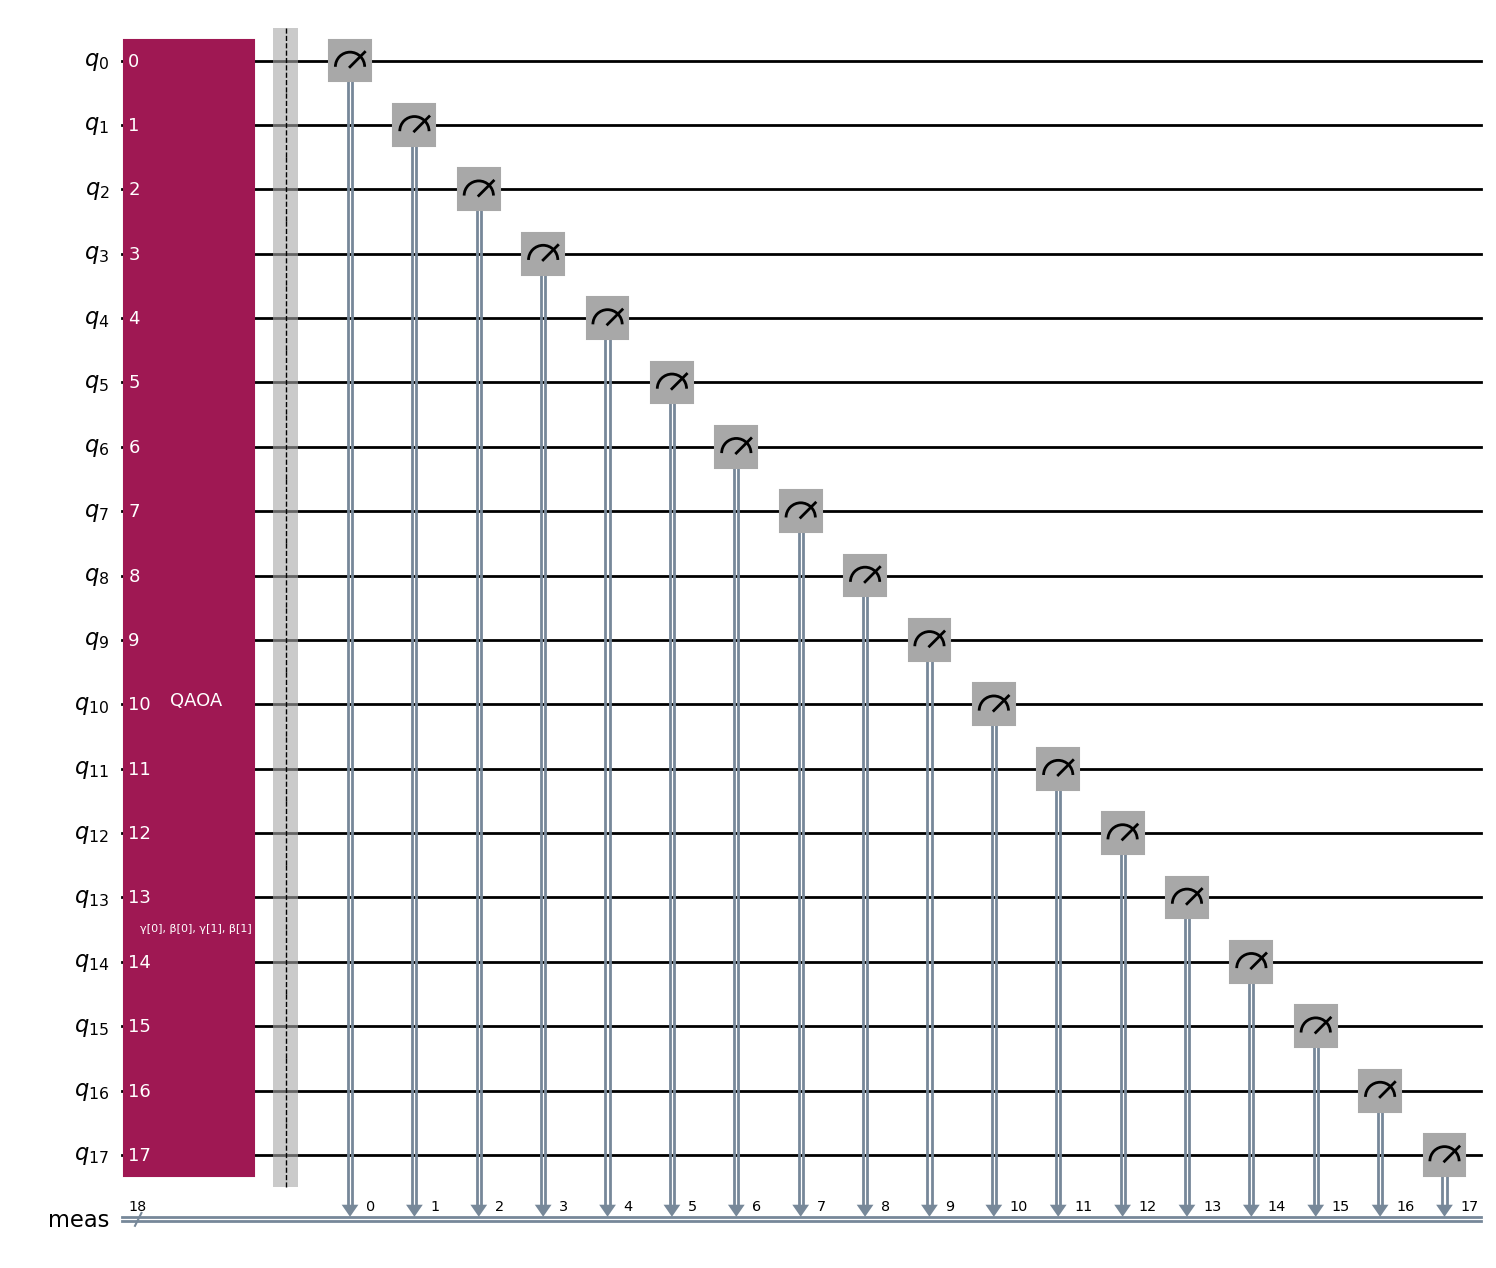

In [68]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.draw('mpl')

In [69]:
circuit.parameters

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])

<IBMBackend('ibm_kyiv')>


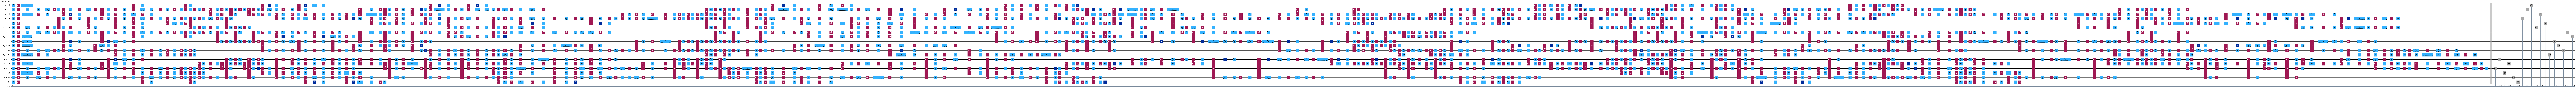

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_aer import AerSimulator

# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
mytoken = 

# Correct initialization
service = QiskitRuntimeService(token=mytoken, channel='ibm_quantum')
backend = service.least_busy(min_num_qubits=127)
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
candidate_circuit.draw('mpl', fold=False, idle_wires=False)

In [71]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta, initial_gamma, initial_beta]

In [72]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [73]:
#Symulator
# Tworzenie obwodu QAOA bez pomiarów
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
# NIE DODAWAJ poniższej linii dla obwodu używanego w estimatorze
# circuit.measure_all()

# Funkcja kosztu dla lokalnego estymatora
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from local estimator"""
    job = estimator.run(
        circuits=[ansatz], 
        observables=[hamiltonian],
        parameter_values=[params]
    )
    result = job.result()
    cost = result.values[0]
    
    objective_func_vals.append(cost)
    
    return cost



In [74]:
#symulator
# Upewnij się, że używasz właściwego importu
from qiskit.primitives import Estimator as LocalEstimator
from scipy.optimize import minimize

# Inicjalizacja lokalnego estymatora (bez argumentów)
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta, initial_gamma, initial_beta]

objective_func_vals = [] # Global variable

# Inicjalizacja lokalnego estymatora
from qiskit.primitives import Estimator
estimator = Estimator()

# Uruchomienie optymalizacji
result = minimize(
    cost_func_estimator,
    init_params,
    args=(circuit, cost_hamiltonian, estimator),
    method="COBYLA",
    tol=1e-3,
)

print(result)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13776\2391297561.py:15: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -629.0937954974349
       x: [ 4.142e+00  1.573e+00  3.141e+00  1.586e+00]
    nfev: 36
   maxcv: 0.0


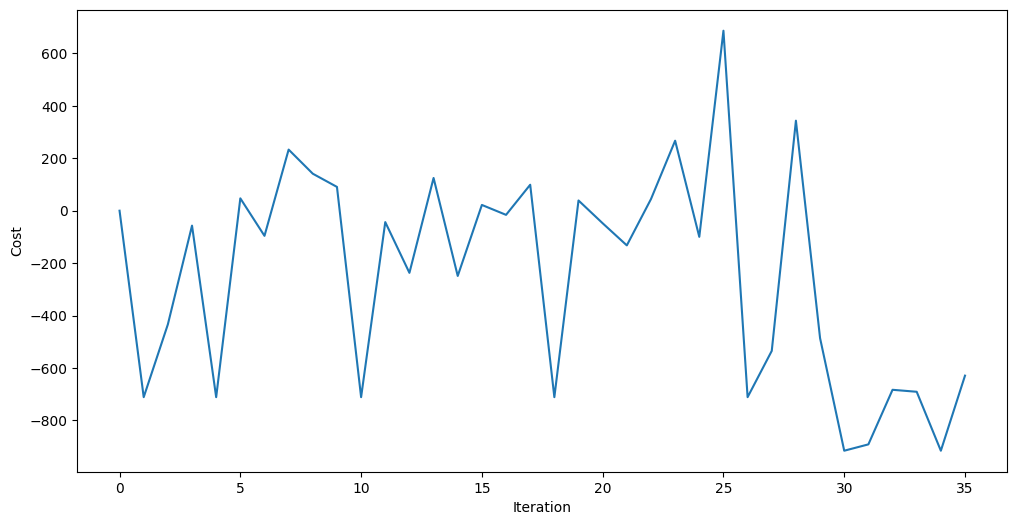

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [76]:
print(f"Number of parameters in the candidate circuit: {len(candidate_circuit.parameters)}")
print(f"Number of values in result.x: {len(result.x)}")

Number of parameters in the candidate circuit: 4
Number of values in result.x: 4


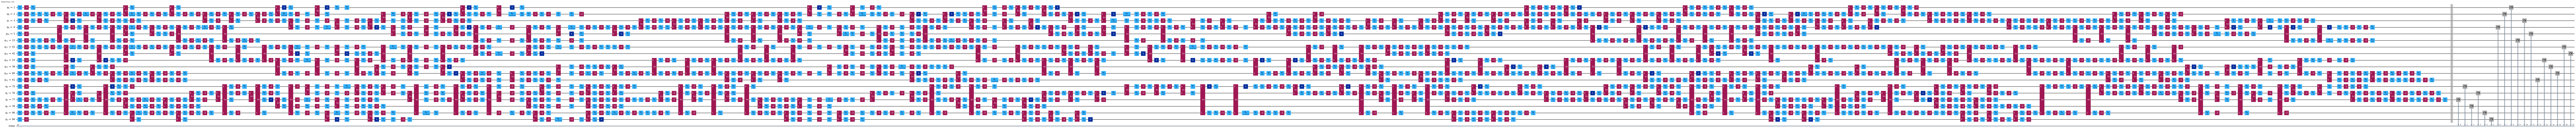

In [77]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [78]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 1000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e3))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

{176711: 0.001, 155242: 0.001, 237814: 0.001, 86205: 0.001, 84158: 0.001, 43395: 0.001, 48182: 0.001, 134313: 0.001, 97041: 0.001, 143466: 0.001, 119526: 0.001, 143364: 0.001, 83273: 0.001, 224494: 0.001, 88562: 0.001, 223858: 0.001, 151116: 0.001, 212145: 0.001, 32486: 0.001, 88172: 0.001, 89856: 0.001, 166550: 0.001, 245994: 0.001, 30660: 0.001, 71104: 0.001, 211815: 0.001, 212210: 0.001, 142528: 0.001, 85106: 0.001, 142392: 0.001, 6664: 0.001, 232454: 0.001, 72492: 0.001, 59600: 0.001, 226107: 0.001, 25812: 0.001, 179925: 0.001, 207382: 0.001, 191565: 0.001, 137334: 0.001, 144113: 0.001, 161130: 0.001, 44086: 0.001, 95762: 0.001, 139674: 0.001, 139090: 0.001, 86826: 0.001, 50017: 0.001, 142956: 0.001, 63899: 0.001, 118959: 0.001, 63542: 0.001, 96419: 0.001, 87163: 0.001, 222919: 0.001, 207974: 0.001, 194725: 0.001, 170470: 0.001, 168008: 0.001, 140388: 0.001, 145450: 0.001, 224417: 0.001, 67486: 0.001, 153650: 0.001, 26654: 0.001, 119776: 0.001, 53782: 0.001, 10537: 0.001, 141728: 0

In [ ]:
most_probable_bitstring = max(counts_bin, key=counts_bin.get)
print("Most probable bitstring:", most_probable_bitstring)

Most probable bitstring: 000001000110000100


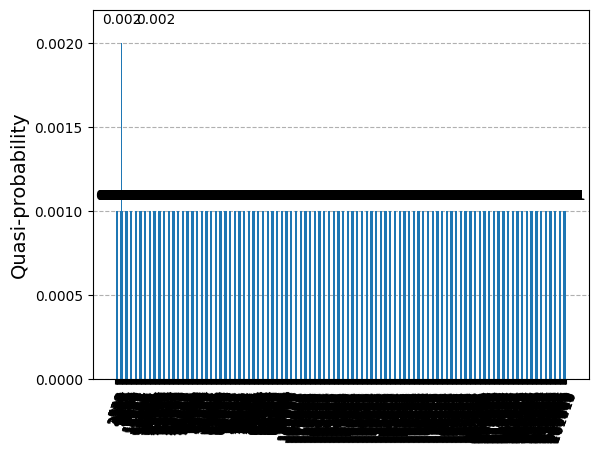

In [80]:
from qiskit.visualization import plot_histogram

# Plot the histogram
plot_histogram(final_distribution_int)

In [89]:
# Stwórz nowy obwód z pomiarami do próbkowania
optimized_circuit = circuit.assign_parameters(result.x)
optimized_circuit_with_measure = optimized_circuit.copy()
optimized_circuit_with_measure.measure_all()

# Użycie lokalnego samplera
# Użycie lokalnego samplera
from qiskit.primitives import Sampler
sampler = Sampler()
job = sampler.run([optimized_circuit_with_measure], shots=10000)
result_sampler = job.result()

# W przypadku lokalnego samplera, format wyniku jest inny
quasi_dists = result_sampler.quasi_dists[0]  # Uzyskaj pierwszą dystrybucję z listy
counts_int = quasi_dists
# Konwersja do formatu binarnego
counts_bin = {}
for bitstring, probability in quasi_dists.items():
    # Konwersja liczby całkowitej na string bitowy
    bits = format(int(bitstring), f'0{optimized_circuit_with_measure.num_clbits}b')
    # Prawdopodobieństwo
    counts_bin[bits] = probability

final_distribution_int = counts_int
final_distribution_bin = counts_bin

print("Rozkład w formacie dziesiętnym:")
print(final_distribution_int)
print("\nRozkład w formacie binarnym:")
print(final_distribution_bin)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8788\151205253.py:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Rozkład w formacie dziesiętnym:
{34: np.float64(0.0001), 39: np.float64(0.0001), 40: np.float64(0.0001), 42: np.float64(0.0001), 49: np.float64(0.0001), 71: np.float64(0.0001), 73: np.float64(0.0001), 80: np.float64(0.0001), 135: np.float64(0.0002), 138: np.float64(0.0001), 179: np.float64(0.0001), 193: np.float64(0.0001), 196: np.float64(0.0001), 198: np.float64(0.0002), 199: np.float64(0.0002), 201: np.float64(0.0001), 203: np.float64(0.0002), 204: np.float64(0.0001), 208: np.float64(0.0001), 209: np.float64(0.0001), 211: np.float64(0.0001), 224: np.float64(0.0003), 230: np.float64(0.0002), 231: np.float64(0.0001), 234: np.float64(0.0001), 239: np.float64(0.0001), 240: np.float64(0.0001), 248: np.float64(0.0001), 288: np.float64(0.0001), 292: np.float64(0.0001), 296: np.float64(0.0001), 320: np.float64(0.0002), 326: np.float64(0.0002), 327: np.float64(0.0004), 329: np.float64(0.0001), 331: np.float64(0.0001), 332: np.float64(0.0001), 333: np.float64(0.0001), 344: np.float64(0.0001), 